In [1]:
import pandas as pd 
df=pd.read_csv("data/Flight_Price.csv")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [6]:
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month


In [7]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute


In [8]:
df['Arrival_Time'] = df['Arrival_Time'].str.split().str[0]
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M', errors='coerce')
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute


In [9]:
def duration_to_minutes(duration):
    h, m = 0, 0
    if 'h' in duration:
        h = int(duration.split('h')[0])
    if 'm' in duration:
        m = int(duration.split('m')[0].split()[-1])
    return h * 60 + m



In [10]:
df['Duration'] = df['Duration'].apply(lambda x: duration_to_minutes(x))

In [11]:
df['Total_Stops'] = df['Total_Stops'].replace({
    'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4
})

/var/folders/04/gq_w2km90pjc_9np76jkv7q80000gn/T/ipykernel_3380/2010962469.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({


In [12]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Route', 'Additional_Info'], axis=1, inplace=True)

In [13]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         1
Price               0
Day_of_Journey      0
Month_of_Journey    0
Dep_Hour            0
Dep_Minute          0
Arrival_Hour        0
Arrival_Minute      0
dtype: int64

In [14]:
mode_value = df['Total_Stops'].mode()[0]
df['Total_Stops'] = df['Total_Stops'].fillna(mode_value)



In [15]:
df.to_csv("data/cleaned_flight_price.csv")

## Exploratory Data Analysis

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

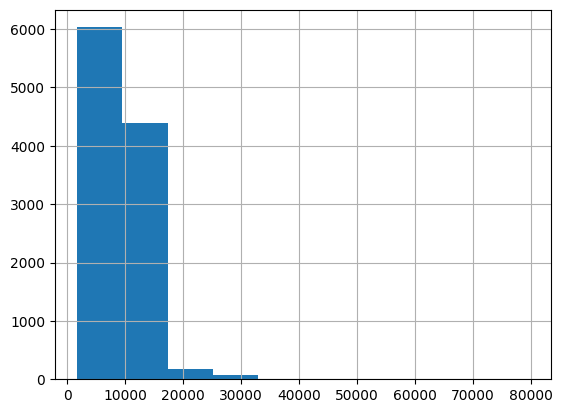

In [17]:
df['Price'].hist()

In [18]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute'],
      dtype='object')

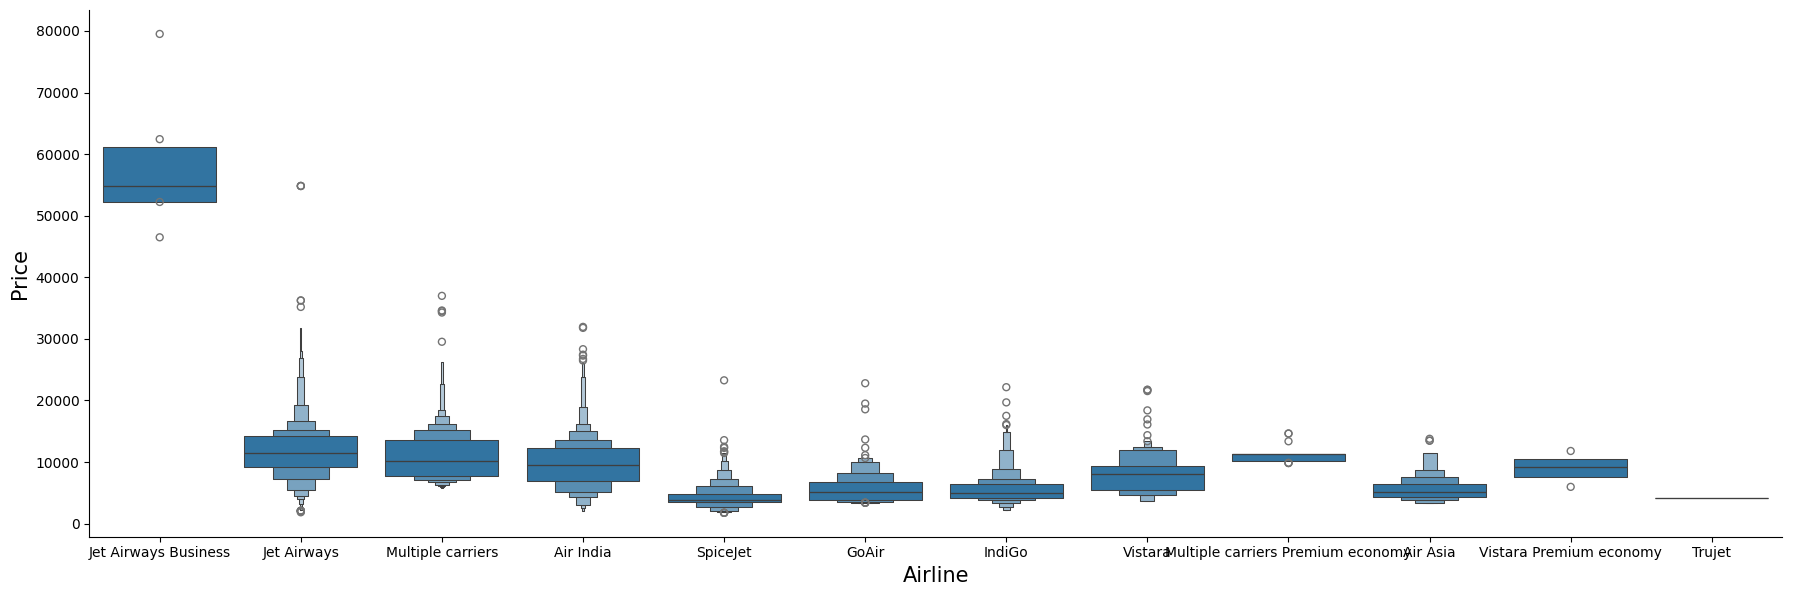

In [19]:
sns.catplot(y = 'Price', x = 'Airline', data = df.sort_values('Price', ascending=False),kind='boxen',height = 6, aspect = 3)
plt.xlabel('Airline',size=15)
plt.ylabel('Price',size=15)
plt.show()

In [20]:
df['Total_Stops'].value_counts()

Total_Stops
1.0    5626
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: count, dtype: int64

In [21]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [22]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [23]:
df['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [24]:
df['Source'].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [25]:
df['Price'].value_counts()

Price
10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
23677      1
6373       1
13143      1
3527       1
3673       1
Name: count, Length: 1870, dtype: int64

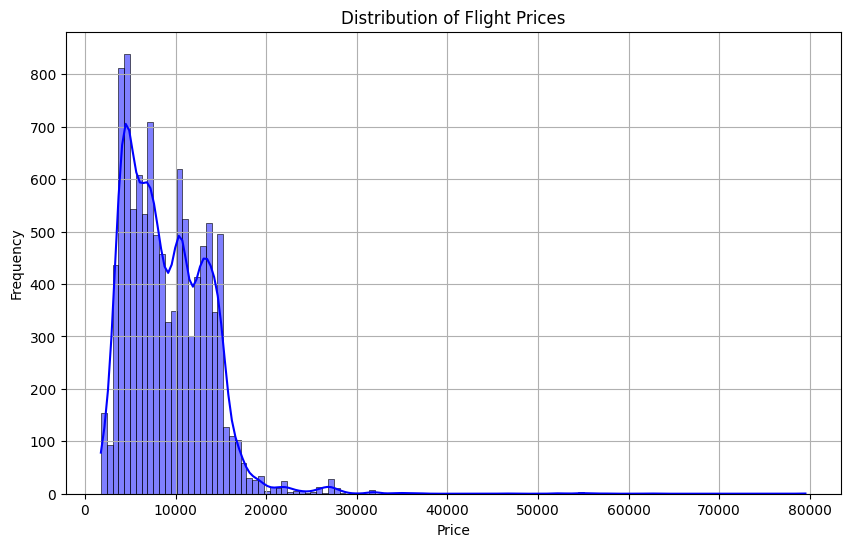

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
# One-Hot Encode categorical features
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'], drop_first=True,dtype='int')


df.head()


,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0.0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2.0,7662,1,5,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,1140,2.0,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,325,1.0,6218,12,5,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1.0,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


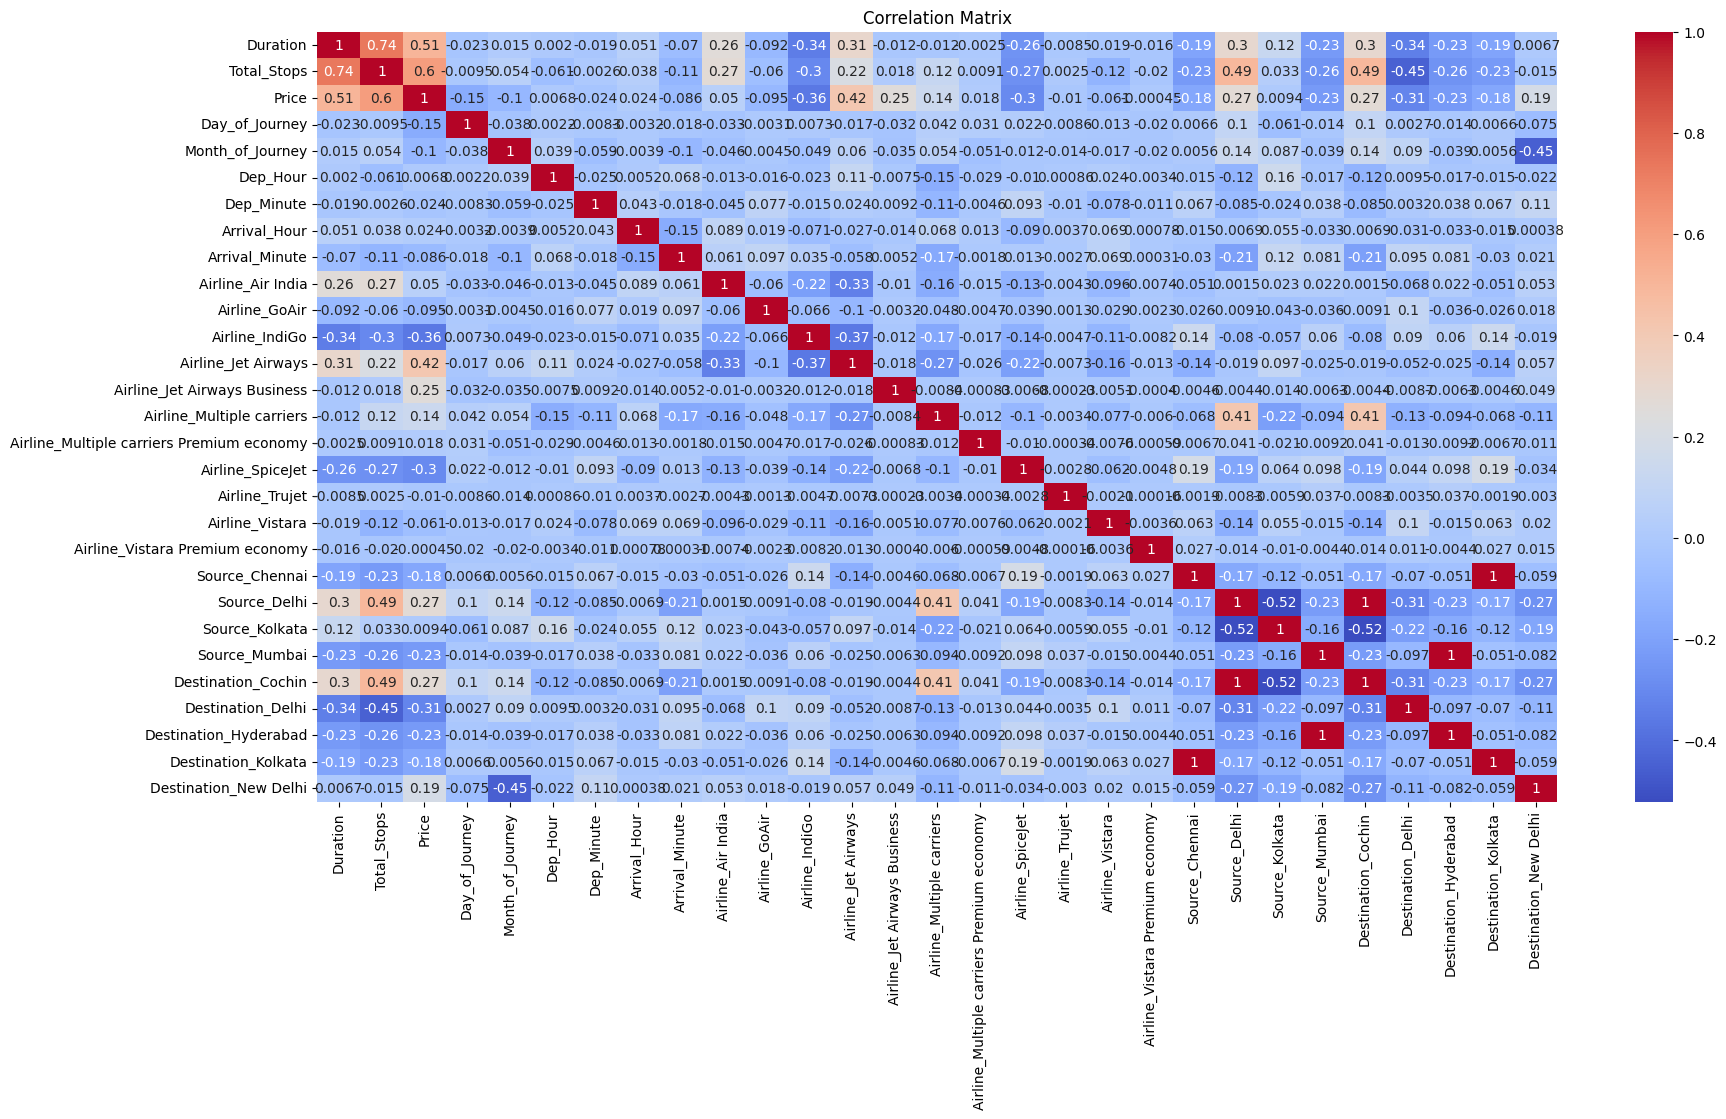

In [28]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
df.to_csv("data/encoded_flight_price.csv")

In [30]:
df.shape

(10683, 29)

In [31]:
df.describe()

,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,...,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,643.093232,0.824207,9087.064121,13.508378,4.708602,12.490686,24.411214,13.348778,24.690630,0.163999,...,0.000281,0.035664,0.424693,0.268745,0.065244,0.424693,0.118412,0.065244,0.035664,0.087241
std,507.862001,0.675199,4611.359167,8.479277,1.164357,5.748650,18.767980,6.859125,16.506036,0.370292,...,0.016756,0.185460,0.494320,0.443328,0.246967,0.494320,0.323111,0.246967,0.185460,0.282202
min,5.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,520.000000,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,930.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2860.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
